## Crop raster data with rioxarray and geopandas

**Question:** How can I crop a raster to a study area <br>
**Objectives:** <br>
- Crop raster data with a bbox
- Crop raster data with a polygon
- Match two raster datasets with different CRS


**Data** <br>
We will use:
1. A sentinel 2 image over Amsterdam.<br>
This data resulted from the previous exercise <br>
You can download the data directly from this [link](https://figshare.com/ndownloader/files/36028100)
Extract the file using double click or running the following command <br>
```
tar -zxvf geospatial-python-raster-dataset.tar
```

2. *fields_cropped.shp* generated in the previous exercise


In [1]:
# import pystac and rioxarray
import pystac
import rioxarray

/home/jovyan/.local/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.2.0) or chardet (5.2.0)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# get the items
items = pystac.ItemCollection.from_file('search.json')

In [3]:
# print the items
items

### 1. Load the raster

In [4]:
# lazy load of the raster 
raster = rioxarray.open_rasterio(items[1].assets['visual'].href)
print(raster.shape)

(3, 10980, 10980)


Note: *open_rasterio* will make a lazy load which means that the data will not be loaded in memory until it is needed.

In [5]:
# get the overview asset
raster_overview = rioxarray.open_rasterio(items[1].assets['visual'].href, overview_level=3)
print(raster_overview.shape)

(3, 687, 687)


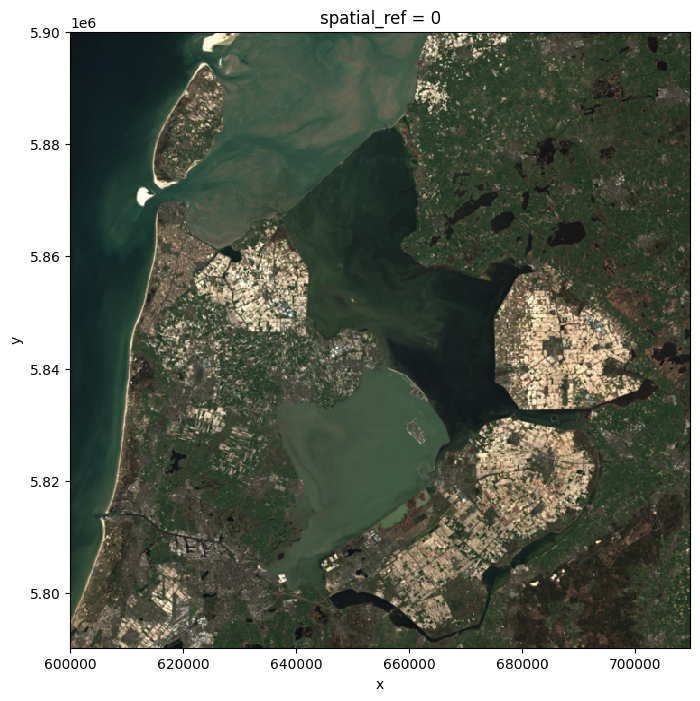

In [6]:
# visualize the raster
raster_overview.plot.imshow(figsize=(8,8))

In [7]:
# compare the size of both rasters
raster.shape, raster_overview.shape

((3, 10980, 10980), (3, 687, 687))

In [8]:
# inspect the raster CRS
raster.rio.crs

CRS.from_epsg(32631)

In [12]:
# import pyproj from CRS



In [13]:
# get detailed information of the CRS


<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 2. Read the vector data

In [9]:
# import geopandas
import geopandas as gpd

In [10]:
# load the polygons of the crop fields
fields = gpd.read_file('./data/fields_cropped.shp')
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119688.039 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120595.295 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121228.989 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121423.197 49..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121425.512 49..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133630.043 493290.582, 133624.619 49..."
4868,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133572.822 493095.040, 133573.087 49..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133480.387 493404.176, 133477.559 49..."
4870,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135049.220 496062.653, 135108.486 49..."


In [13]:
# check the CRS of the shp
raster.rio.crs

CRS.from_epsg(32631)

<br>

**Note:** To crop a raster with a vector data, both datasets must be in the same CRS
As the raster is bigger --> let's convert the vector data

In [14]:
# convert the vector data  
fields = fields.to_crs(raster.rio.crs)

In [15]:
# inspect the vector data crs
fields.crs

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The function *clip_box* allows one to crop a raster by the min,max of the x and y coordinates.

In [17]:
# show the help of clip_box 
raster.rio.clip_box?

Signature:
raster.rio.clip_box(
    minx: float,
    miny: float,
    maxx: float,
    maxy: float,
    auto_expand: Union[bool, int] = False,
    auto_expand_limit: int = 3,
    crs: Any = None,
) -> xarray.core.dataarray.DataArray
Docstring:
Clip the :obj:`xarray.DataArray` by a bounding box.

.. versionadded:: 0.12 crs

Parameters
----------
minx: float
    Minimum bound for x coordinate.
miny: float
    Minimum bound for y coordinate.
maxx: float
    Maximum bound for x coordinate.
maxy: float
    Maximum bound for y coordinate.
auto_expand: Union[bool, int]
    If True, it will expand clip search if only 1D raster found with clip.
auto_expand_limit: int
    maximum number of times the clip will be retried before raising
    an exception.
crs: :obj:`rasterio.crs.CRS`, optional
    The CRS of the bounding box. Default is to assume it is the same
    as the dataset.

Returns
-------
xarray.DataArray:
    The clipped object.
File:      /usr/local/lib/python3.8/dist-packages/rioxarray/

### 3. Crop the raster with a bounding box

In [18]:
# crop the raster with the bounding box 
raster_clip_box = raster.rio.clip_box(*fields.total_bounds)

In [20]:
# print the size of the clipped raster
raster_clip_box.shape, raster.shape

((3, 1574, 1584), (3, 10980, 10980))

In [21]:
# display raster info
raster_clip_box

<xarray.DataArray (band: 3, y: 1574, x: 1584)>
[7479648 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.268e+05 6.268e+05 ... 6.426e+05 6.426e+05
  * y            (y) float64 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

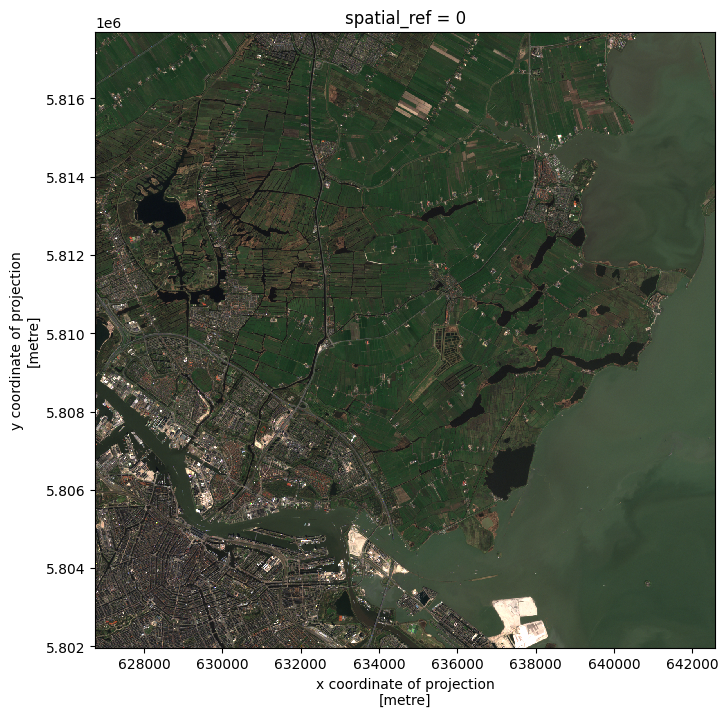

In [22]:
# show the clipped raster
raster_clip_box.plot.imshow(figsize=(8,8))

In [23]:
# inspect nodata values
raster_clip_box.rio.nodata

0

In [24]:
# save the raster
raster_clip_box.rio.to_raster('raster_clip.tif')

### 4. Crop a raster with polygons
We clipped the image to an extent. 
We might want to crop the image to the exact fields.<br>

In [25]:
# clip the raster image using the geometry of fields 
raster_clip_fields = raster.rio.clip(fields['geometry'])

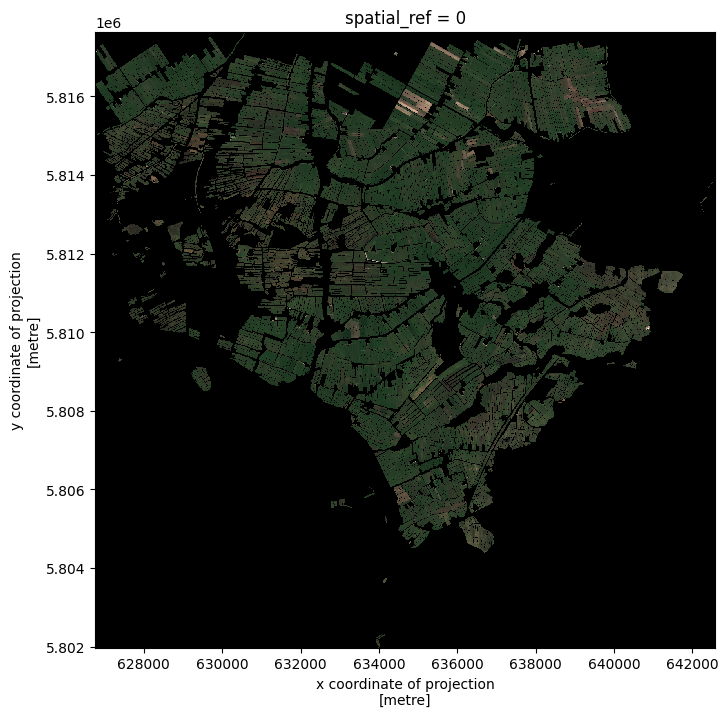

In [44]:
# visualize the results
raster_clip_fields.plot.imshow(figsize=(8,8)

### 5.Exercise - Crop raster with a specific code

The column *"gewascode"* (translated as "crop code") of *fields* contains the code representing the type of plant grown in each field.<br>
Can you:
1. Select the fields with "gewascode" equal to 257
2. crop the raster *raster_clip* with the selected fields
3. Visualice the crop image.


### 5 - A solution

<AxesSubplot: >

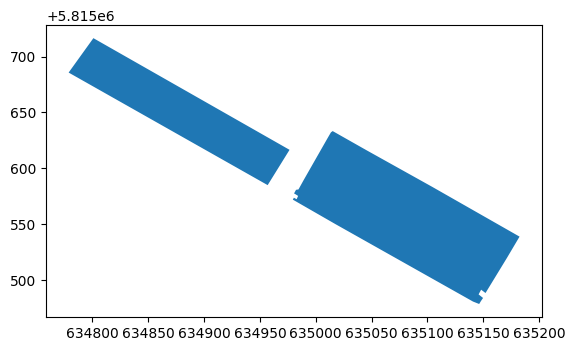

In [45]:
# 1. filtering the fields
fields_257 = fields[fields.gewascode == 257]
fields_257.plot()

In [47]:
# 2. clip the raster with the selected fields
raster_257 = raster.rio.clip(fields_257['geometry'])
raster_257

<xarray.DataArray (band: 3, y: 23, x: 40)>
array([[[  0, 193, 194, ...,   0,   0,   0],
        [  0, 197, 195, ...,   0,   0,   0],
        [179, 195, 196, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  95,   0,   0],
        [  0,   0,   0, ...,  86,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0, 160, 161, ...,   0,   0,   0],
        [  0, 162, 163, ...,   0,   0,   0],
        [156, 165, 161, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  78,   0,   0],
        [  0,   0,   0, ...,  74,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0, 136, 134, ...,   0,   0,   0],
        [  0, 135, 133, ...,   0,   0,   0],
        [128, 139, 138, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  67,   0,   0],
        [  0,   0,   0, ...,  66,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.348e+05 6.348e+05 ... 6.352e+05 6.352e+05
  * y            (y) float64 5.816e+06 5.816e+06 ... 5.815e+06 5.815e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

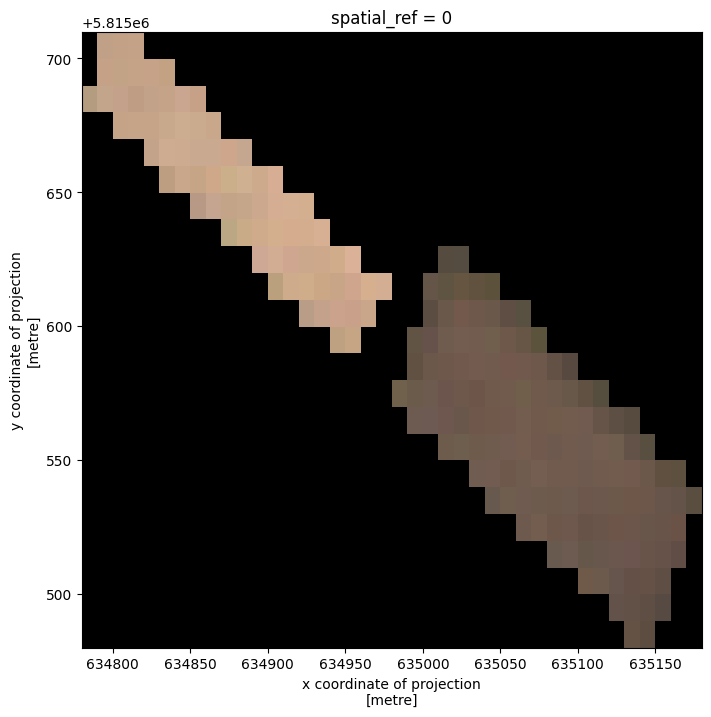

In [48]:
# 3. visualice the raster
raster_257.plot.imshow(figsize=(8,8))

In [51]:
# inspect no data values
raster_257.rio.nodata

0

### Recap

1. Load raster data using pystac.itemcollection and a search file
2. Load vector data and reproject it to a raster CRS
3. Clip a raster using a bbox
4. Clip a raster using a geoseries
